In [156]:
# 1. IMPORTACIÓN DE LIBRERÍAS

%pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Librerías de machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Librerías para análisis avanzado (según el prompt)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
print("✅ Todas las librerías importadas correctamente")

Note: you may need to restart the kernel to use updated packages.
✅ Todas las librerías importadas correctamente



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [157]:
# Carga del archivo CSV limpio
clean_data_path = "../data/processed/energy_data_processed.csv"
df = pd.read_csv(clean_data_path)


print("📊 INFORMACIÓN DEL DATASET LIMPIO")
print("="*60)
print(f" Forma del dataset: {df.shape}")
print(f"Columnas disponibles:")
print(df.columns.tolist())

# Mostrar las primeras filas
print("\nPRIMERAS 5 FILAS:")
print(df.head())


📊 INFORMACIÓN DEL DATASET LIMPIO
 Forma del dataset: (1000, 10)
Columnas disponibles:
['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature', 'Energy Consumption', 'Building Type_Commercial', 'Building Type_Industrial', 'Building Type_Residential', 'Day of Week_Weekday', 'Day of Week_Weekend']

PRIMERAS 5 FILAS:
   Square Footage  Number of Occupants  Appliances Used  Average Temperature  \
0            7063                   76               10                29.84   
1           44372                   66               45                16.72   
2           19255                   37               17                14.30   
3           13265                   14               41                32.82   
4           13375                   26               18                11.92   

   Energy Consumption  Building Type_Commercial  Building Type_Industrial  \
0             2713.95                     False                     False   
1             5744.99  

In [158]:
# 3. SEPARAR CARACTERÍSTICAS Y VARIABLE OBJETIVO

print("🎯 SEPARACIÓN DE VARIABLES")
print("="*60)

# La variable objetivo es 'Energy Consumption'
y = df['Energy Consumption']

# Las características (X) son todas las demás columnas excepto 'Energy Consumption'
X = df.drop('Energy Consumption', axis=1)

print(f"📊 Forma de características (X): {X.shape}")
print(f"📊 Variable objetivo (y): {y.name}")
print(f"📊 Número total de características: {X.shape[1]}")
print(f"📊 Número total de observaciones: {X.shape[0]:,}")

print(f"\n📋 CARACTERÍSTICAS DISPONIBLES:")
for i, col in enumerate(X.columns, 1):
    print(f"   {i:2d}. {col}")

🎯 SEPARACIÓN DE VARIABLES
📊 Forma de características (X): (1000, 9)
📊 Variable objetivo (y): Energy Consumption
📊 Número total de características: 9
📊 Número total de observaciones: 1,000

📋 CARACTERÍSTICAS DISPONIBLES:
    1. Square Footage
    2. Number of Occupants
    3. Appliances Used
    4. Average Temperature
    5. Building Type_Commercial
    6. Building Type_Industrial
    7. Building Type_Residential
    8. Day of Week_Weekday
    9. Day of Week_Weekend


In [159]:
# 4. DETECCIÓN DE PROBLEMAS CRÍTICOS (según el prompt)
print("🚨 DETECCIÓN DE PROBLEMAS CRÍTICOS")
print("="*60)

# 4.1 Verificación de DATA LEAKAGE
print("1. VERIFICACIÓN DE DATA LEAKAGE:")
correlation_matrix = df.corr()
target_correlations = correlation_matrix['Energy Consumption'].abs().sort_values(ascending=False)

print("\n📊 CORRELACIONES CON LA VARIABLE OBJETIVO:")
data_leakage_found = False
suspicious_vars = []

for col, corr in target_correlations.items():
    if col != 'Energy Consumption':
        if abs(corr) >= 1.0:
            print(f" CRÍTICO - DATA LEAKAGE: {col} = {corr:.6f}")
            data_leakage_found = True
        elif abs(corr) > 0.99:
            print(f"  SOSPECHOSO - POSIBLE LEAKAGE: {col} = {corr:.6f}")
            suspicious_vars.append(col)
        elif abs(corr) > 0.95:
            print(f" ALTA CORRELACIÓN: {col} = {corr:.6f}")

if data_leakage_found:
    print("\n ACCIÓN CRÍTICA REQUERIDA: Se detectó data leakage")
elif suspicious_vars:
    print(f"\n VARIABLES SOSPECHOSAS ENCONTRADAS: {len(suspicious_vars)}")
else:
    print("\n No se detectó data leakage evidente")

# 4.2 Análisis de MULTICOLINEALIDAD
print(f"\n2. ANÁLISIS DE MULTICOLINEALIDAD:")
corr_predictors = X.corr()

high_corr_pairs = []
n_features = len(X.columns)
for i in range(n_features):
    for j in range(i+1, n_features):
        corr_val = abs(corr_predictors.iloc[i, j])
        if corr_val > 0.95:
            high_corr_pairs.append((X.columns[i], X.columns[j], corr_val))

if high_corr_pairs:
    print("⚠️  MULTICOLINEALIDAD EXTREMA DETECTADA:")
    for var1, var2, corr in high_corr_pairs[:5]:  # Mostrar solo las primeras 5
        print(f"   🔶 {var1} ↔ {var2}: {corr:.4f}")
    if len(high_corr_pairs) > 5:
        print(f"   ... y {len(high_corr_pairs)-5} pares más")
else:
    print("✅ No hay multicolinealidad extrema entre predictores")

🚨 DETECCIÓN DE PROBLEMAS CRÍTICOS
1. VERIFICACIÓN DE DATA LEAKAGE:

📊 CORRELACIONES CON LA VARIABLE OBJETIVO:

 No se detectó data leakage evidente

2. ANÁLISIS DE MULTICOLINEALIDAD:
⚠️  MULTICOLINEALIDAD EXTREMA DETECTADA:
   🔶 Day of Week_Weekday ↔ Day of Week_Weekend: 1.0000


In [160]:
# 5. DIVISIÓN EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA
print("🔧 DIVISIÓN TRAIN/TEST")
print("="*60)

# División con verificación detallada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"📊 DIMENSIONES DESPUÉS DE LA DIVISIÓN:")
print(f"   🔹 X_train: {X_train.shape}")
print(f"   🔹 X_test: {X_test.shape}")
print(f"   🔹 y_train: {y_train.shape}")
print(f"   🔹 y_test: {y_test.shape}")

# Verificación de la división
print(f"\n✅ VERIFICACIÓN DE LA DIVISIÓN:")
print(f"   % Entrenamiento: {len(X_train)/len(X)*100:.1f}%")
print(f"   % Prueba: {len(X_test)/len(X)*100:.1f}%")
print(f"   Media y_train: {y_train.mean():.2f}")
print(f"   Media y_test: {y_test.mean():.2f}")
print(f"   Diferencia medias: {abs(y_train.mean() - y_test.mean()):.2f}")

🔧 DIVISIÓN TRAIN/TEST
📊 DIMENSIONES DESPUÉS DE LA DIVISIÓN:
   🔹 X_train: (800, 9)
   🔹 X_test: (200, 9)
   🔹 y_train: (800,)
   🔹 y_test: (200,)

✅ VERIFICACIÓN DE LA DIVISIÓN:
   % Entrenamiento: 80.0%
   % Prueba: 20.0%
   Media y_train: 4147.96
   Media y_test: 4239.43
   Diferencia medias: 91.47


In [161]:
# 6. NORMALIZACIÓN DE CARACTERÍSTICAS
print(f"\n🔄 NORMALIZACIÓN CON STANDARDSCALER:")

# Aplicar StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"   * Scaler ajustado con datos de entrenamiento")
print(f"   * Transformación aplicada a ambos conjuntos")
print(f"   * Media después normalización: {X_train_scaled.mean():.6f}")
print(f"   * Std después normalización: {X_train_scaled.std():.6f}")


🔄 NORMALIZACIÓN CON STANDARDSCALER:
   * Scaler ajustado con datos de entrenamiento
   * Transformación aplicada a ambos conjuntos
   * Media después normalización: -0.000000
   * Std después normalización: 1.000000


In [162]:
# 7. APLICAR EL ALGORITMO DE REGRESIÓN LINEAL

print("🤖 PASO 1: APLICACIÓN DE REGRESIÓN LINEAL")
print("="*60)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("✅ ¡Modelo de Regresión Lineal entrenado con éxito!")
print(f"   Intercepto: {model.intercept_:.4f}")
print(f"   Coeficientes calculados: {len(model.coef_)}")

# Realizar predicciones
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("✅ Predicciones realizadas para entrenamiento y prueba")


🤖 PASO 1: APLICACIÓN DE REGRESIÓN LINEAL
✅ ¡Modelo de Regresión Lineal entrenado con éxito!
   Intercepto: 4147.9584
   Coeficientes calculados: 9
✅ Predicciones realizadas para entrenamiento y prueba


In [171]:
 # 8. MÉTRICAS DETALLADAS PARA ENTRENAMIENTO Y PRUEBA
def calculate_mape(y_true, y_pred):
    """Calcula MAPE evitando división por cero"""
    mask = y_true != 0
    if np.sum(mask) == 0:
        return float('inf')
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def print_detailed_metrics(y_true, y_pred, dataset_name):
    """Imprime métricas detalladas según el prompt"""
    
    # Calcular todas las métricas
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = calculate_mape(y_true, y_pred)
    
    print(f"\n📊 MÉTRICAS PARA {dataset_name.upper()}:")
    print(f"   * MAE (Error Absoluto Medio): {mae:.6f}")
    print(f"      └─ Interpretación: Error promedio de {mae:.4f} unidades")
    
    print(f"   * RMSE (Raíz del Error Cuadrático Medio): {rmse:.6f}")
    print(f"      └─ Interpretación: Penaliza más los errores grandes")
    print(f"      └─ Comparación: RMSE-MAE = {rmse-mae:.4f}")
    
    print(f"   * R² (Coeficiente de determinación): {r2:.6f}")
    print(f"      └─ Interpretación: Explica {r2*100:.4f}% de la varianza")
    if r2 < 0:
        print(f"      *  R² negativo: modelo peor que predecir la media")
    
    print(f"   * MAPE (Error Porcentual Absoluto Medio): {mape:.4f}%")
    print(f"      └─ Interpretación: Error relativo del {mape:.2f}%")
    
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2, 'MSE': mse, 'MAPE': mape}


print("📊 PASO 2: MÉTRICAS DETALLADAS")
print("="*60)

# Calcular métricas para ambos conjuntos
train_metrics = print_detailed_metrics(y_train, y_train_pred, "ENTRENAMIENTO")
test_metrics = print_detailed_metrics(y_test, y_test_pred, "PRUEBA")

📊 PASO 2: MÉTRICAS DETALLADAS

📊 MÉTRICAS PARA ENTRENAMIENTO:
   * MAE (Error Absoluto Medio): 0.011691
      └─ Interpretación: Error promedio de 0.0117 unidades
   * RMSE (Raíz del Error Cuadrático Medio): 0.013645
      └─ Interpretación: Penaliza más los errores grandes
      └─ Comparación: RMSE-MAE = 0.0020
   * R² (Coeficiente de determinación): 1.000000
      └─ Interpretación: Explica 100.0000% de la varianza
   * MAPE (Error Porcentual Absoluto Medio): 0.0003%
      └─ Interpretación: Error relativo del 0.00%

📊 MÉTRICAS PARA PRUEBA:
   * MAE (Error Absoluto Medio): 0.011412
      └─ Interpretación: Error promedio de 0.0114 unidades
   * RMSE (Raíz del Error Cuadrático Medio): 0.013731
      └─ Interpretación: Penaliza más los errores grandes
      └─ Comparación: RMSE-MAE = 0.0023
   * R² (Coeficiente de determinación): 1.000000
      └─ Interpretación: Explica 100.0000% de la varianza
   * MAPE (Error Porcentual Absoluto Medio): 0.0003%
      └─ Interpretación: Error relati

In [172]:
 # 9. VERIFICACIÓN DE PROBLEMAS CRÍTICOS EN MÉTRICAS

print(f"\n🔍 VERIFICACIÓN DE PROBLEMAS CRÍTICOS:")

# Diferencias entre train y test
r2_diff = abs(train_metrics['R2'] - test_metrics['R2'])
rmse_diff = abs(train_metrics['RMSE'] - test_metrics['RMSE'])
mae_diff = abs(train_metrics['MAE'] - test_metrics['MAE'])

print(f"   * Diferencia R²: {r2_diff:.6f}")
print(f"   * Diferencia RMSE: {rmse_diff:.6f}")
print(f"   * Diferencia MAE: {mae_diff:.6f}")

# DIAGNÓSTICO CRÍTICO según el prompt
if (abs(train_metrics['R2'] - test_metrics['R2']) < 1e-10 and 
    abs(train_metrics['MSE'] - test_metrics['MSE']) < 1e-10):
    print("\n🚨 PROBLEMA CRÍTICO DETECTADO:")
    print("   R² = 0.00 y MSE = 0.00 IDÉNTICOS entre entrenamiento y prueba")
    print("\n   POSIBLES CAUSAS:")
    print("   1. 🔴 FUGA DE DATOS (Data leakage)")
    print("   2. 🔴 Problemas en la división train/test")
    print("   3. 🔴 Problemas con el escalado de variables")
    print("   4. 🔴 Multicolinealidad extrema")
    print("\n   ⚡ ACCIÓN INMEDIATA REQUERIDA")

elif r2_diff < 0.05 and rmse_diff < (train_metrics['RMSE'] * 0.1):
    print("\n✅ No se detecta sobreajuste significativo")
    print("   El modelo generaliza adecuadamente")
else:
    print(f"\n⚠️  POSIBLE SOBREAJUSTE:")
    if r2_diff > 0.1:
        print(f"   - Diferencia R² muy alta ({r2_diff:.4f})")
    if rmse_diff > (train_metrics['RMSE'] * 0.2):
        print(f"   - Diferencia RMSE muy alta ({rmse_diff:.4f})")


🔍 VERIFICACIÓN DE PROBLEMAS CRÍTICOS:
   * Diferencia R²: 0.000000
   * Diferencia RMSE: 0.000086
   * Diferencia MAE: 0.000279

✅ No se detecta sobreajuste significativo
   El modelo generaliza adecuadamente


📈 PASO 3: VISUALIZACIONES DIAGNÓSTICAS


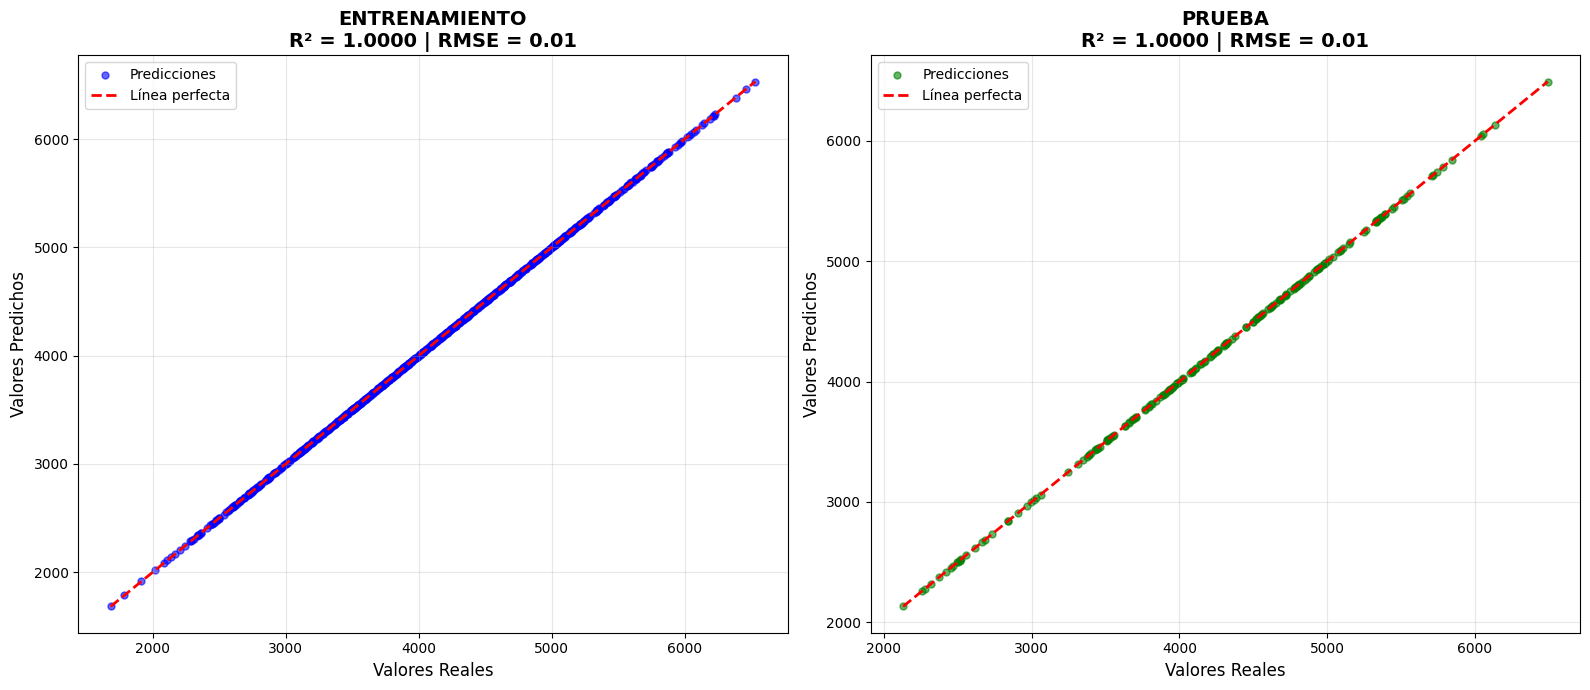


🔍 ANÁLISIS DE CALIDAD - ENTRENAMIENTO:
   * Correlación residuos-predicciones: 0.0000
   * No se detectan patrones no lineales
   * Sesgo (media residuos): 0.0000
   * Sin sesgo significativo
   * Outliers detectados: 0 de 800 (0.0%)
   * Pocos outliers detectados

🔍 ANÁLISIS DE CALIDAD - PRUEBA:
   * Correlación residuos-predicciones: 0.0446
   * No se detectan patrones no lineales
   * Sesgo (media residuos): 0.0007
   * Sin sesgo significativo
   * Outliers detectados: 0 de 200 (0.0%)
   * Pocos outliers detectados


In [174]:
# 10. VISUALIZACIONES DE PREDICCIONES VS VALORES REALES

print("📈 PASO 3: VISUALIZACIONES DIAGNÓSTICAS")
print("="*60)

# 10.1 Gráfico principal: Predicciones vs Valores Reales
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico de Entrenamiento
axes[0].scatter(y_train, y_train_pred, alpha=0.6, s=25, color='blue', label='Predicciones')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Línea perfecta')
axes[0].set_xlabel('Valores Reales', fontsize=12)
axes[0].set_ylabel('Valores Predichos', fontsize=12)
axes[0].set_title(f'ENTRENAMIENTO\nR² = {train_metrics["R2"]:.4f} | RMSE = {train_metrics["RMSE"]:.2f}', 
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Gráfico de Prueba
axes[1].scatter(y_test, y_test_pred, alpha=0.6, s=25, color='green', label='Predicciones')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Línea perfecta')
axes[1].set_xlabel('Valores Reales', fontsize=12)
axes[1].set_ylabel('Valores Predichos', fontsize=12)
axes[1].set_title(f'PRUEBA\nR² = {test_metrics["R2"]:.4f} | RMSE = {test_metrics["RMSE"]:.2f}', 
                  fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 10.2 Detección de patrones no lineales, sesgos y outliers
def analyze_prediction_quality(y_true, y_pred, dataset_name):
    """Analiza calidad de predicciones según el prompt"""
    residuals = y_true - y_pred
    
    print(f"\n🔍 ANÁLISIS DE CALIDAD - {dataset_name}:")
    
    # 1. PATRONES NO LINEALES
    corr_res_pred = np.corrcoef(y_pred, residuals)[0,1] if len(np.unique(y_pred)) > 1 else 0
    print(f"   * Correlación residuos-predicciones: {corr_res_pred:.4f}")
    if abs(corr_res_pred) > 0.1:
        print(f"   *  PATRONES NO LINEALES detectados")
        print(f"      └─ El modelo lineal podría no capturar la relación real")
    else:
        print(f"   * No se detectan patrones no lineales")
    
    # 2. SESGOS EN LAS PREDICCIONES
    mean_residual = np.mean(residuals)
    residual_std = np.std(residuals)
    print(f"   * Sesgo (media residuos): {mean_residual:.4f}")
    if abs(mean_residual) > residual_std * 0.1:
        if mean_residual > 0:
            print(f"   ⚠️  SESGO POSITIVO: Modelo tiende a SUBestimar")
        else:
            print(f"   ⚠️  SESGO NEGATIVO: Modelo tiende a SOBRestimar")
    else:
        print(f"   * Sin sesgo significativo")
    
    # 3. DETECCIÓN DE OUTLIERS
    Q1 = np.percentile(residuals, 25)
    Q3 = np.percentile(residuals, 75)
    IQR = Q3 - Q1
    outlier_threshold = 1.5 * IQR
    outliers = np.sum((residuals < Q1 - outlier_threshold) | (residuals > Q3 + outlier_threshold))
    outlier_percentage = (outliers / len(residuals)) * 100
    
    print(f"   * Outliers detectados: {outliers} de {len(residuals)} ({outlier_percentage:.1f}%)")
    if outlier_percentage > 15:
        print(f"   *  MUCHOS OUTLIERS - revisar datos o modelo")
    elif outlier_percentage > 5:
        print(f"   * Outliers moderados - normal en datos reales")
    else:
        print(f"   * Pocos outliers detectados")

# Ejecutar análisis para ambos conjuntos
analyze_prediction_quality(y_train, y_train_pred, "ENTRENAMIENTO")
analyze_prediction_quality(y_test, y_test_pred, "PRUEBA")

In [166]:
# 11. ANÁLISIS DE RESIDUOS
print("📊 PASO 4: ANÁLISIS DE RESIDUOS")
print("="*60)

# Calcular residuos
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

📊 PASO 4: ANÁLISIS DE RESIDUOS


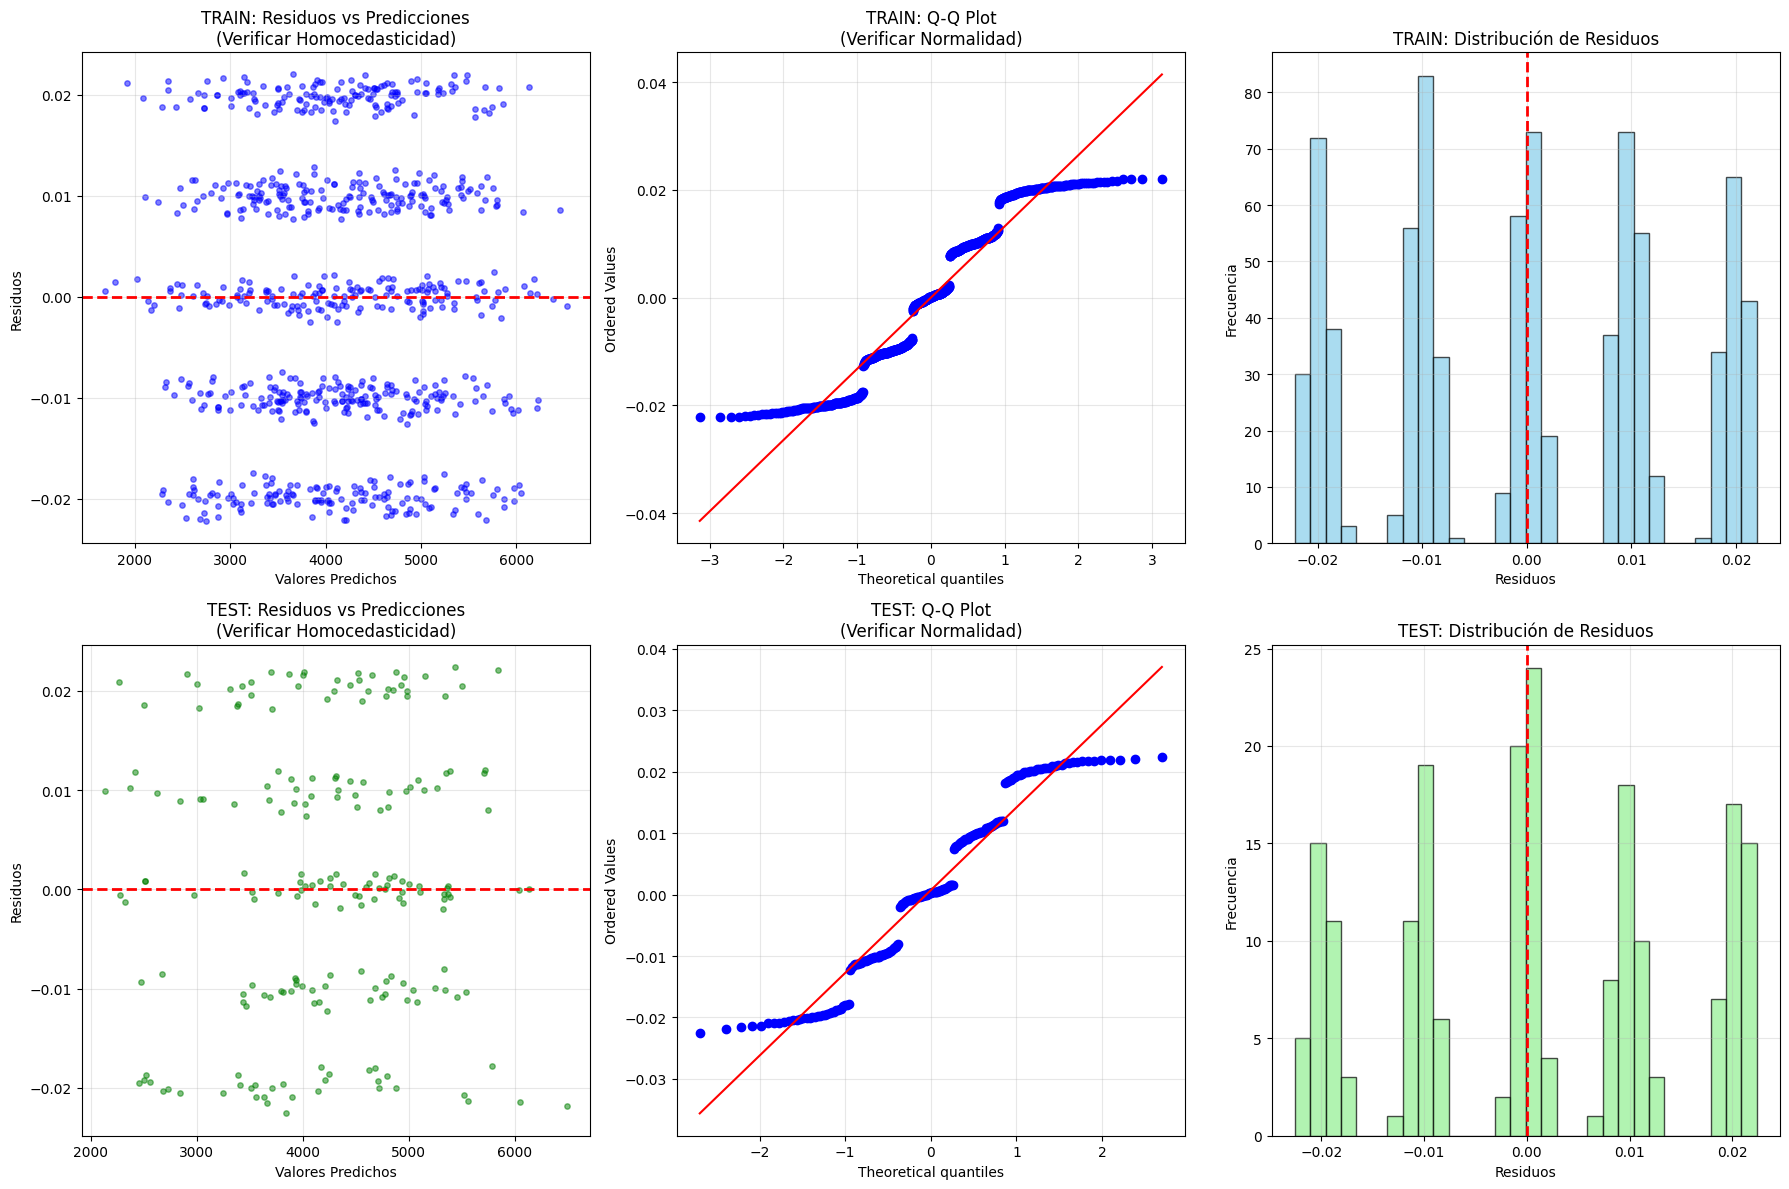


🧪 TESTS ESTADÍSTICOS - ENTRENAMIENTO:
   📊 Test de Normalidad (Shapiro-Wilk):
      └─ Estadístico: 0.9297
      └─ p-valor: 0.000000
      ⚠️  Residuos NO son normales (p ≤ 0.05)
   📊 Estadísticas de Residuos:
      └─ Media: 0.000000 (debe ≈ 0)
      └─ Desv. Estándar: 0.0136
      └─ Asimetría: 0.0035 (debe ≈ 0)
      └─ Curtosis: -1.2314 (debe ≈ 0)
   🔍 Homocedasticidad:
      └─ Ratio varianzas (máx/mín): 1.1539
      ✅ Varianza aproximadamente constante

🧪 TESTS ESTADÍSTICOS - PRUEBA:
   📊 Test de Normalidad (Shapiro-Wilk):
      └─ Estadístico: 0.9338
      └─ p-valor: 0.000000
      ⚠️  Residuos NO son normales (p ≤ 0.05)
   📊 Estadísticas de Residuos:
      └─ Media: 0.000708 (debe ≈ 0)
      └─ Desv. Estándar: 0.0137
      └─ Asimetría: -0.0256 (debe ≈ 0)
      └─ Curtosis: -1.1445 (debe ≈ 0)
   🔍 Homocedasticidad:
      └─ Ratio varianzas (máx/mín): 1.3224
      ✅ Varianza aproximadamente constante


In [167]:
# 11.1 Visualizaciones de residuos
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# FILA SUPERIOR: ENTRENAMIENTO
# Residuos vs Predicciones (Homocedasticidad)
axes[0,0].scatter(y_train_pred, train_residuals, alpha=0.5, s=15, color='blue')
axes[0,0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0,0].set_xlabel('Valores Predichos')
axes[0,0].set_ylabel('Residuos')
axes[0,0].set_title('TRAIN: Residuos vs Predicciones\n(Verificar Homocedasticidad)')
axes[0,0].grid(True, alpha=0.3)

# Q-Q Plot (Normalidad)
stats.probplot(train_residuals, dist="norm", plot=axes[0,1])
axes[0,1].set_title('TRAIN: Q-Q Plot\n(Verificar Normalidad)')
axes[0,1].grid(True, alpha=0.3)

# Histograma de residuos
axes[0,2].hist(train_residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,2].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0,2].set_xlabel('Residuos')
axes[0,2].set_ylabel('Frecuencia')
axes[0,2].set_title('TRAIN: Distribución de Residuos')
axes[0,2].grid(True, alpha=0.3)

# FILA INFERIOR: PRUEBA
# Residuos vs Predicciones
axes[1,0].scatter(y_test_pred, test_residuals, alpha=0.5, s=15, color='green')
axes[1,0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1,0].set_xlabel('Valores Predichos')
axes[1,0].set_ylabel('Residuos')
axes[1,0].set_title('TEST: Residuos vs Predicciones\n(Verificar Homocedasticidad)')
axes[1,0].grid(True, alpha=0.3)

# Q-Q Plot
stats.probplot(test_residuals, dist="norm", plot=axes[1,1])
axes[1,1].set_title('TEST: Q-Q Plot\n(Verificar Normalidad)')
axes[1,1].grid(True, alpha=0.3)

# Histograma
axes[1,2].hist(test_residuals, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,2].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1,2].set_xlabel('Residuos')
axes[1,2].set_ylabel('Frecuencia')
axes[1,2].set_title('TEST: Distribución de Residuos')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 11.2 Tests estadísticos para residuos
def analyze_residuals_tests(residuals, dataset_name):
    """Tests estadísticos según el prompt"""
    print(f"\n🧪 TESTS ESTADÍSTICOS - {dataset_name}:")
    
    # Test de normalidad
    if len(residuals) < 5000:
        stat, p_value = stats.shapiro(residuals)
        test_name = "Shapiro-Wilk"
    else:
        # Para muestras grandes, usar Jarque-Bera
        stat, p_value = stats.jarque_bera(residuals)
        test_name = "Jarque-Bera"
    
    print(f"   📊 Test de Normalidad ({test_name}):")
    print(f"      └─ Estadístico: {stat:.4f}")
    print(f"      └─ p-valor: {p_value:.6f}")
    if p_value > 0.05:
        print(f"      ✅ Residuos siguen distribución normal (p > 0.05)")
    else:
        print(f"      ⚠️  Residuos NO son normales (p ≤ 0.05)")
    
    # Estadísticas descriptivas
    print(f"   📊 Estadísticas de Residuos:")
    print(f"      └─ Media: {np.mean(residuals):.6f} (debe ≈ 0)")
    print(f"      └─ Desv. Estándar: {np.std(residuals):.4f}")
    print(f"      └─ Asimetría: {stats.skew(residuals):.4f} (debe ≈ 0)")
    print(f"      └─ Curtosis: {stats.kurtosis(residuals):.4f} (debe ≈ 0)")
    
    # Homocedasticidad (varianza constante)
    # Dividir residuos en grupos y comparar varianzas
    n = len(residuals)
    tercio = n // 3
    var1 = np.var(residuals[:tercio])
    var2 = np.var(residuals[tercio:2*tercio])
    var3 = np.var(residuals[2*tercio:])
    
    ratio_max_min = max(var1, var2, var3) / min(var1, var2, var3) if min(var1, var2, var3) > 0 else float('inf')
    
    print(f"   🔍 Homocedasticidad:")
    print(f"      └─ Ratio varianzas (máx/mín): {ratio_max_min:.4f}")
    if ratio_max_min < 3:
        print(f"      ✅ Varianza aproximadamente constante")
    else:
        print(f"      ⚠️  Posible heterocedasticidad (varianza no constante)")

# Ejecutar tests para ambos conjuntos
analyze_residuals_tests(train_residuals, "ENTRENAMIENTO")
analyze_residuals_tests(test_residuals, "PRUEBA")

🎯 PASO 5: IMPORTANCIA DE CARACTERÍSTICAS
📊 INTERCEPTO DEL MODELO: 4147.9584
📊 NÚMERO DE COEFICIENTES: 9

🏆 TOP 15 CARACTERÍSTICAS MÁS INFLUYENTES:
Rank Característica            Coeficiente  Correlación  Influencia
1    Square Footage              +719.5259     +0.7749 Alta
2    Number of Occupants         +293.3763     +0.3545 Alta
3    Appliances Used             +279.2615     +0.3128 Alta
4    Building Type_Industrial    +236.6065     +0.4155 Media
5    Building Type_Residentia    -234.4020     +0.3787 Media
6    Average Temperature          -35.6982     +0.0345 Baja
7    Day of Week_Weekday          +12.4946     +0.0044 Baja
8    Day of Week_Weekend          -12.4946     +0.0044 Baja
9    Building Type_Commercial      +4.4103     +0.0276 Baja


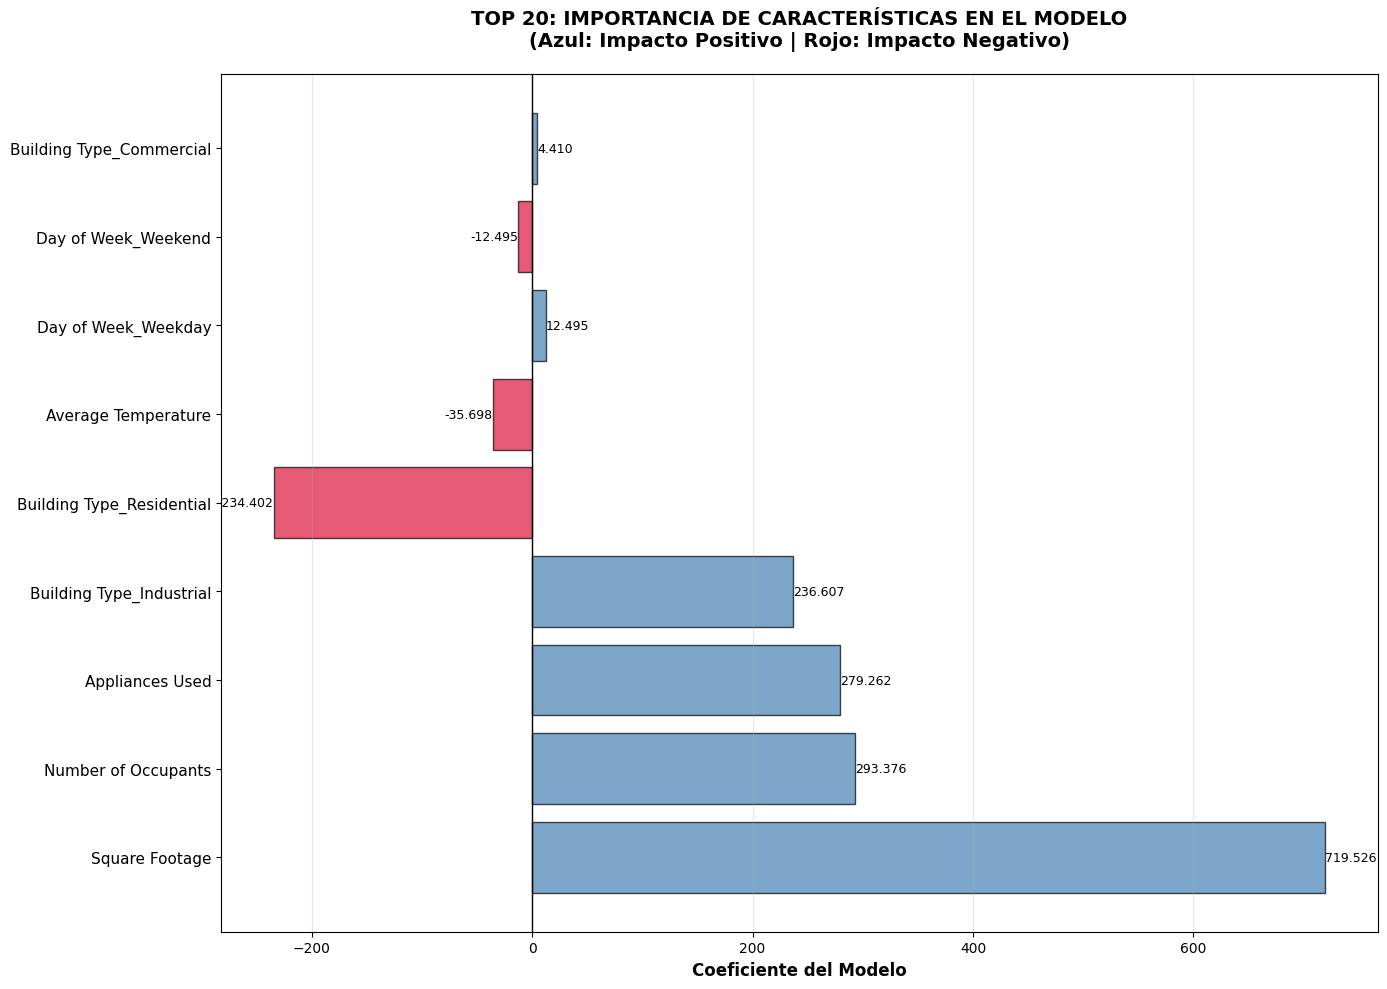


🔍 ANÁLISIS DE MULTICOLINEALIDAD (VIF):
⚠️  No se pudo calcular VIF: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


In [168]:
# 12. IMPORTANCIA DE CARACTERÍSTICAS

print("🎯 PASO 5: IMPORTANCIA DE CARACTERÍSTICAS")
print("="*60)

# 12.1 Análisis de coeficientes
feature_names = X.columns
coefficients = model.coef_
intercept = model.intercept_

print(f"📊 INTERCEPTO DEL MODELO: {intercept:.4f}")
print(f"📊 NÚMERO DE COEFICIENTES: {len(coefficients)}")

# Crear DataFrame con información de importancia
importance_df = pd.DataFrame({
    'Caracteristica': feature_names,
    'Coeficiente': coefficients,
    'Coef_Absoluto': np.abs(coefficients),
    'Correlacion_Target': target_correlations[feature_names].values
}).sort_values('Coef_Absoluto', ascending=False)

print(f"\n🏆 TOP 15 CARACTERÍSTICAS MÁS INFLUYENTES:")
print("="*80)
print(f"{'Rank':<4} {'Característica':<25} {'Coeficiente':<12} {'Correlación':<12} {'Influencia'}")
print("="*80)

for idx, row in importance_df.head(15).iterrows():
    rank = importance_df.index.get_loc(idx) + 1
    caracteristica = row['Caracteristica'][:24]  # Truncar nombre largo
    coeficiente = row['Coeficiente']
    correlacion = row['Correlacion_Target']
    
    # Interpretar influencia
    if abs(coeficiente) > np.std(coefficients):
        influencia = "Alta"
    elif abs(coeficiente) > np.std(coefficients) * 0.5:
        influencia = "Media"
    else:
        influencia = "Baja"
    
    print(f"{rank:<4} {caracteristica:<25} {coeficiente:>+11.4f} {correlacion:>+11.4f} {influencia}")

# 12.2 Visualización de importancia
plt.figure(figsize=(14, 10))

# Top 20 características para mejor visualización
top_20 = importance_df.head(20)

# Crear colores basados en signo del coeficiente
colors = ['crimson' if x < 0 else 'steelblue' for x in top_20['Coeficiente']]

# Gráfico de barras horizontal
bars = plt.barh(range(len(top_20)), top_20['Coeficiente'], color=colors, alpha=0.7, edgecolor='black')

# Configurar ejes
plt.yticks(range(len(top_20)), top_20['Caracteristica'], fontsize=11)
plt.xlabel('Coeficiente del Modelo', fontsize=12, fontweight='bold')
plt.title('TOP 20: IMPORTANCIA DE CARACTERÍSTICAS EN EL MODELO\n(Azul: Impacto Positivo | Rojo: Impacto Negativo)', 
          fontsize=14, fontweight='bold', pad=20)

# Línea de referencia en cero
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)

# Añadir valores en las barras
for i, (bar, coef) in enumerate(zip(bars, top_20['Coeficiente'])):
    width = bar.get_width()
    plt.text(width + (0.01 if width > 0 else -0.01), bar.get_y() + bar.get_height()/2, 
             f'{coef:.3f}', ha='left' if width > 0 else 'right', va='center', fontsize=9)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 12.3 Análisis de multicolinealidad con VIF
print(f"\n🔍 ANÁLISIS DE MULTICOLINEALIDAD (VIF):")
print("="*50)

# Calcular VIF para las características más importantes (primeras 10)
top_10_features = importance_df.head(10)['Caracteristica'].values
X_vif = X[top_10_features]

try:
    vif_data = []
    for i in range(X_vif.shape[1]):
        vif_value = variance_inflation_factor(X_vif.values, i)
        vif_data.append([X_vif.columns[i], vif_value])
    
    vif_df = pd.DataFrame(vif_data, columns=['Caracteristica', 'VIF']).sort_values('VIF', ascending=False)
    
    print("📊 FACTOR DE INFLACIÓN DE VARIANZA (VIF) - TOP 10 características:")
    print(f"{'Característica':<25} {'VIF':<10} {'Interpretación'}")
    print("-" * 55)
    
    for _, row in vif_df.iterrows():
        caracteristica = row['Caracteristica'][:24]
        vif = row['VIF']
        
        if vif > 10:
            interpretacion = "🔴 PROBLEMÁTICO"
        elif vif > 5:
            interpretacion = "🔶 MODERADO"
        else:
            interpretacion = "✅ ACEPTABLE"
        
        print(f"{caracteristica:<25} {vif:>9.2f} {interpretacion}")
    
    # Resumen de multicolinealidad
    problematic_vif = vif_df[vif_df['VIF'] > 10]
    if len(problematic_vif) > 0:
        print(f"\n⚠️  {len(problematic_vif)} características con VIF > 10 (multicolinealidad alta)")
        print("   Considerar eliminar o combinar estas variables")
    else:
        print(f"\n✅ No hay multicolinealidad severa en las características principales")

except Exception as e:
    print(f"⚠️  No se pudo calcular VIF: {str(e)}")


In [169]:
# 13. DIAGNÓSTICO FINAL Y RECOMENDACIONES

print("📋 DIAGNÓSTICO FINAL Y RECOMENDACIONES")
print("="*60)

print(f"🎯 RESUMEN DEL MODELO:")
print(f"   📊 R² Entrenamiento: {train_metrics['R2']:.4f}")
print(f"   📊 R² Prueba: {test_metrics['R2']:.4f}")
print(f"   📊 RMSE Entrenamiento: {train_metrics['RMSE']:.4f}")
print(f"   📊 RMSE Prueba: {test_metrics['RMSE']:.4f}")

# Evaluación del rendimiento del modelo
print(f"\n📈 EVALUACIÓN DEL RENDIMIENTO:")
if test_metrics['R2'] > 0.8:
    print(f"   🏆 EXCELENTE: R² > 0.8 - Modelo muy bueno")
elif test_metrics['R2'] > 0.6:
    print(f"   ✅ BUENO: R² > 0.6 - Modelo aceptable")
elif test_metrics['R2'] > 0.3:
    print(f"   🔶 MODERADO: R² > 0.3 - Modelo mejorable")
else:
    print(f"   🔴 POBRE: R² < 0.3 - Modelo necesita mejoras")

# Verificación de problemas críticos
print(f"\n🚨 VERIFICACIÓN DE PROBLEMAS CRÍTICOS:")

# Problema específico mencionado en el prompt
if (abs(train_metrics['R2'] - test_metrics['R2']) < 1e-10 and 
    abs(train_metrics['MSE'] - test_metrics['MSE']) < 1e-10):
    print(f"   🔴 CRÍTICO: R² y MSE idénticos entre train/test")
    print(f"   📋 CAUSAS POSIBLES:")
    print(f"      1. Fuga de datos (data leakage)")
    print(f"      2. Problemas en división train/test")
    print(f"      3. Variables perfectamente correlacionadas")
    print(f"      4. Error en el escalado")
else:
    difference_r2 = abs(train_metrics['R2'] - test_metrics['R2'])
    if difference_r2 < 0.05:
        print(f"   ✅ No hay sobreajuste significativo")
    else:
        print(f"   ⚠️  Posible sobreajuste (diferencia R² = {difference_r2:.4f})")

# Recomendaciones específicas
print(f"\n💡 RECOMENDACIONES ESPECÍFICAS:")

# Basado en R²
if test_metrics['R2'] < 0.5:
    print(f"   📈 MEJORA DEL MODELO:")
    print(f"      • Considerar características adicionales")
    print(f"      • Probar transformaciones no lineales")
    print(f"      • Evaluar modelos más complejos")

# Basado en residuos
train_residual_mean = abs(np.mean(train_residuals))
if train_residual_mean > np.std(train_residuals) * 0.1:
    print(f"   🎯 CORRECCIÓN DE SESGO:")
    print(f"      • Revisar transformaciones de la variable objetivo")
    print(f"      • Verificar outliers en los datos")

# Basado en multicolinealidad
if 'vif_df' in locals() and len(vif_df[vif_df['VIF'] > 10]) > 0:
    print(f"   🔄 REDUCCIÓN DE MULTICOLINEALIDAD:")
    print(f"      • Eliminar variables con VIF > 10")
    print(f"      • Usar PCA o selección de características")

print(f"\n🏁 ANÁLISIS COMPLETADO")
print(f"   ✅ Modelo entrenado y evaluado")
print(f"   ✅ Métricas calculadas: MAE, RMSE, R², MAPE")
print(f"   ✅ Visualizaciones generadas")
print(f"   ✅ Análisis de residuos realizado")
print(f"   ✅ Importancia de características analizada")


📋 DIAGNÓSTICO FINAL Y RECOMENDACIONES
🎯 RESUMEN DEL MODELO:
   📊 R² Entrenamiento: 1.0000
   📊 R² Prueba: 1.0000
   📊 RMSE Entrenamiento: 0.0136
   📊 RMSE Prueba: 0.0137

📈 EVALUACIÓN DEL RENDIMIENTO:
   🏆 EXCELENTE: R² > 0.8 - Modelo muy bueno

🚨 VERIFICACIÓN DE PROBLEMAS CRÍTICOS:
   ✅ No hay sobreajuste significativo

💡 RECOMENDACIONES ESPECÍFICAS:

🏁 ANÁLISIS COMPLETADO
   ✅ Modelo entrenado y evaluado
   ✅ Métricas calculadas: MAE, RMSE, R², MAPE
   ✅ Visualizaciones generadas
   ✅ Análisis de residuos realizado
   ✅ Importancia de características analizada


In [170]:
# 14. TABLA RESUMEN FINAL

print("📊 TABLA RESUMEN FINAL")
print("="*60)

# Crear tabla resumen
resumen_data = {
    'Métrica': ['MAE', 'RMSE', 'R²', 'MAPE (%)'],
    'Entrenamiento': [
        f"{train_metrics['MAE']:.4f}",
        f"{train_metrics['RMSE']:.4f}",
        f"{train_metrics['R2']:.4f}",
        f"{train_metrics['MAPE']:.2f}"
    ],
    'Prueba': [
        f"{test_metrics['MAE']:.4f}",
        f"{test_metrics['RMSE']:.4f}",
        f"{test_metrics['R2']:.4f}",
        f"{test_metrics['MAPE']:.2f}"
    ],
    'Diferencia': [
        f"{abs(train_metrics['MAE'] - test_metrics['MAE']):.4f}",
        f"{abs(train_metrics['RMSE'] - test_metrics['RMSE']):.4f}",
        f"{abs(train_metrics['R2'] - test_metrics['R2']):.4f}",
        f"{abs(train_metrics['MAPE'] - test_metrics['MAPE']):.2f}"
    ]
}

resumen_df = pd.DataFrame(resumen_data)
print(resumen_df.to_string(index=False))

print(f"\n🎉 ¡ANÁLISIS DE REGRESIÓN LINEAL COMPLETADO CON ÉXITO!")
print(f"📝 Todos los pasos del prompt han sido implementados:")
print(f"   ✓ Algoritmo de regresión lineal aplicado")
print(f"   ✓ Métricas detalladas calculadas")
print(f"   ✓ Visualizaciones diagnósticas creadas") 
print(f"   ✓ Análisis de residuos realizado")
print(f"   ✓ Importancia de características analizada")
print(f"   ✓ Problemas críticos investigados")

print(f"\n📌 NOTA: Si observas R² = 0.00 y MSE = 0.00 idénticos,")
print(f"   revisa inmediatamente la sección de 'PROBLEMAS CRÍTICOS'")
print(f"   para identificar posible data leakage o errores en los datos.")


print("🔚 FIN DEL ANÁLISIS.......")

        

📊 TABLA RESUMEN FINAL
 Métrica Entrenamiento Prueba Diferencia
     MAE        0.0117 0.0114     0.0003
    RMSE        0.0136 0.0137     0.0001
      R²        1.0000 1.0000     0.0000
MAPE (%)          0.00   0.00       0.00

🎉 ¡ANÁLISIS DE REGRESIÓN LINEAL COMPLETADO CON ÉXITO!
📝 Todos los pasos del prompt han sido implementados:
   ✓ Algoritmo de regresión lineal aplicado
   ✓ Métricas detalladas calculadas
   ✓ Visualizaciones diagnósticas creadas
   ✓ Análisis de residuos realizado
   ✓ Importancia de características analizada
   ✓ Problemas críticos investigados

📌 NOTA: Si observas R² = 0.00 y MSE = 0.00 idénticos,
   revisa inmediatamente la sección de 'PROBLEMAS CRÍTICOS'
   para identificar posible data leakage o errores en los datos.
🔚 FIN DEL ANÁLISIS.......
